In [62]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec, cm, colors

import pandas
import glob
import os
import json

import extinction

import sncosmo
import piscola as pisco
from astropy.table import Table


#sns.set(font_scale=1.5, context='paper', style='white')
%config InlineBackend.figure_format = 'retina'
plt.rcParams["font.family"] = "Gentium"
plt.rcParams['mathtext.fontset'] = "cm"

In [73]:
x_low, x_high = 3000., 9000.
wave = np.arange(x_low, x_high, 10)

a_lambda = {'CCM89': extinction.ccm89(wave, 1.0, 3.1),
            "O'Donnell (1994)": extinction.odonnell94(wave, 1.0, 3.1),
            'Fitzpatrick (1999)': extinction.fitzpatrick99(wave, 1.0),
            'Calzetti (2000)': extinction.calzetti00(wave, 1.0, 3.1),
            'FM07': extinction.fm07(wave, 1.0)}

V_lam = 5450

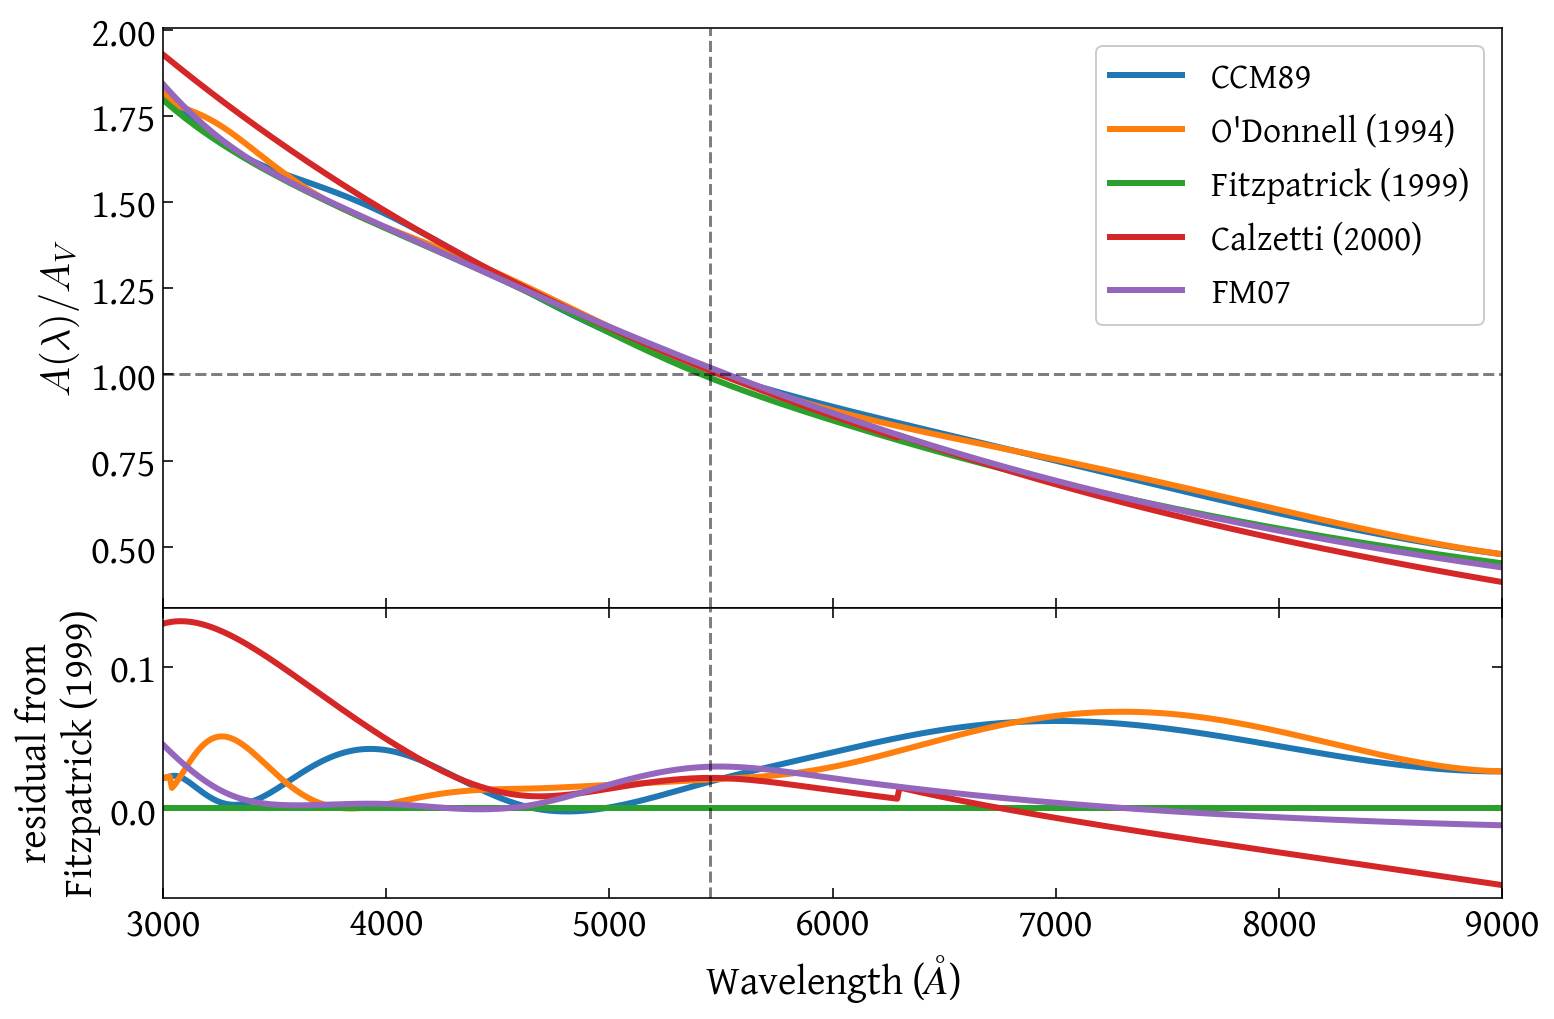

In [75]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

a_fitz = a_lambda['Fitzpatrick (1999)']
for law, a_lam in a_lambda.items():
    ax[0].plot(wave, a_lam, lw=3, label=law)
    ax[1].plot(wave, a_lam-a_fitz, lw=3, label=law)
     
ax[0].axvline(V_lam, ls='--', color='k', alpha=0.5)
ax[0].axhline(1, ls='--', color='k', alpha=0.5)
ax[1].axvline(V_lam, ls='--', color='k', alpha=0.5)

ax[0].set_ylabel(r'$A(\lambda)/A_V$', fontsize=20)
ax[0].tick_params('both', labelsize=20, direction='in', length=5)
ax[0].legend(fontsize=18, framealpha=1)

ax[1].set_ylabel('residual from\nFitzpatrick (1999)', fontsize=20)
ax[1].set_xlabel(r'Wavelength ($\AA$)', fontsize=20)
ax[1].tick_params('both', labelsize=20, direction='in', length=5, top=True, right=True)
ax[1].set_xlim(x_low, x_high)

plt.subplots_adjust(hspace=0)
#plt.savefig('plots/extinction_curve_dust_laws.pdf', bbox_inches='tight')
plt.show()

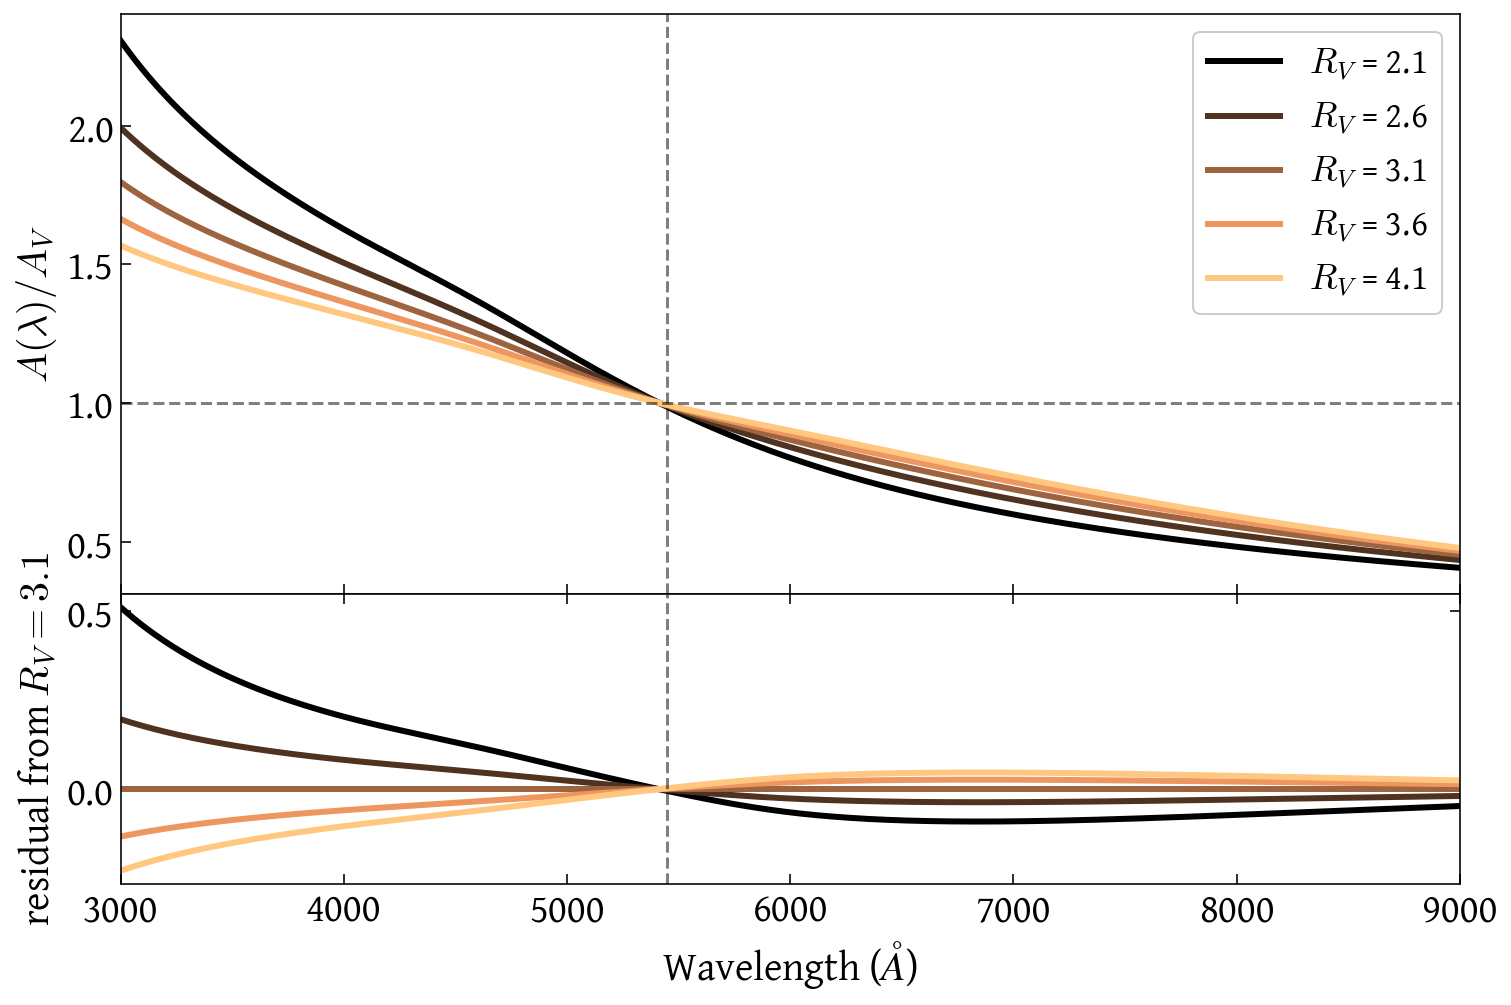

In [71]:
cmap = cm.get_cmap('copper')
norm = colors.Normalize(vmin=2.1, vmax=4.1)
s_m = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
s_m.set_array([])

fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

r_v_list = [2.1, 2.6, 3.1, 3.6, 4.1]
a_rv_31 =  extinction.fitzpatrick99(wave, 1.0, 3.1)

for r_v in r_v_list:
    a_lam = extinction.fitzpatrick99(wave, 1.0, r_v)
    ax[0].plot(wave, a_lam, lw=3, c=s_m.to_rgba(r_v), label=r'$R_V$ = '+ str(r_v))
    ax[1].plot(wave, a_lam-a_rv_31, lw=3, c=s_m.to_rgba(r_v))
     
ax[0].axvline(V_lam, ls='--', color='k', alpha=0.5)
ax[0].axhline(1, ls='--', color='k', alpha=0.5)
ax[1].axvline(V_lam, ls='--', color='k', alpha=0.5)

ax[0].set_ylabel(r'$A(\lambda)/A_V$', fontsize=20)
ax[0].tick_params('both', labelsize=20, direction='in', length=5)
ax[0].legend(fontsize=18, framealpha=1)

ax[1].set_ylabel(r'residual from $R_V = 3.1$', fontsize=20)
ax[1].set_xlabel(r'Wavelength ($\AA$)', fontsize=20)
ax[1].tick_params('both', labelsize=20, direction='in', length=5, top=True, right=True)
ax[1].set_xlim(x_low, x_high)

plt.subplots_adjust(hspace=0)
#plt.savefig('plots/extinction_curve_rv.pdf', bbox_inches='tight')
plt.show()